<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [ ]:
##### Your Code Here #####

In [1]:
import numpy as np

np.random.seed(82)

X = np.array(([0,0,1],
              [0,1,1],
              [1,0,1],
              [0,1,0],
              [1,0,0],
              [1,1,1],
              [0,0,0]),
             dtype=int
             )

y = np.array(([0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]), dtype=int)

In [2]:
print(X.shape)
print(y.shape)

(7, 3)
(7, 1)


In [3]:
class NeuralNetwork:
    def __init__(self):
        # Set up architecture
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward
        """
        
        # Weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden layer and output layer
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        
        """
        Backward propagate through the network
        """
        
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) # Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) # adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [4]:
nn = NeuralNetwork()

cost = []
for i in range(1000):
    cost.append(np.mean(np.square(y - nn.feed_forward(X))))
    nn.train(X, y)
    
print("Predicted Output: \n" + str(nn.feed_forward(X)))
print("Loss: \n" + str(np.mean(np.square(y - nn.feed_forward(X)))))

Predicted Output: 
[[0.00819898]
 [0.95769016]
 [0.95834071]
 [0.95276897]
 [0.95232182]
 [0.05248301]
 [0.0790566 ]]
Loss: 
0.0024430333283203616


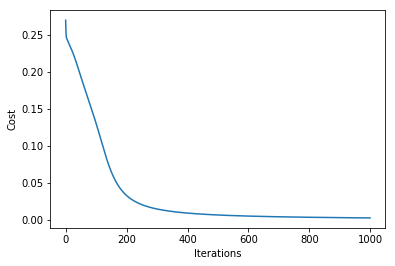

In [6]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [10]:
# input image dimensions
img_rows, img_cols = 28, 28

In [11]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
# let's take a look at them:
(x_train, y_train), (x_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
print('x_train before normalization', x_train)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
print('x_test before normalization', x_test)


# Normalize Our Data
print('# Normalize our data')
x_train = x_train / 255
print('x_train normalized', x_train)
x_test = x_test / 255
print('x_test normalized', x_test)

x_train before normalization [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_test before normalization [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
# Normalize our data
x_train normalized [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_test normalized [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [18]:
import numpy as np

y_temp = np.zeros(y_train.shape)
print('y_temp: ', y_temp)
y_temp[np.where(y_train == 0.0)[0]] = 1

y_train = y_temp
print('y_train: ', y_train)

#####
y_temp = np.zeros(y_test.shape)
print('y_temp:', y_temp)
y_temp[np.where(y_test == 0.0)[0]] = 1

y_test = y_temp
print('y_test:', y_test)

y_temp:  [0. 0. 0. ... 0. 0. 0.]
y_train:  [0. 1. 0. ... 0. 0. 0.]
y_temp: [0. 0. 0. ... 0. 0. 0.]
y_test: [0. 0. 0. ... 0. 0. 0.]


In [19]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Estimating Your `net

In [21]:
##### Your Code Here #####

class NeuralNetwork(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 784
        self.outputLayerSize = 1
        self.hiddenLayerSize = 32
        
        #Weights (parameters)
        self.weights1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.weights2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.weights1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.weights2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return z * (1 - z)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
        
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [22]:
y_train = y_train.reshape(-1, 1)
nn = NeuralNetwork()

In [23]:
y_train

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
for i in range(1000):
    if (i in [a for a in range(7)]) or ((i + 1) % 100 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', x_train)
        print('Actual Output: \n', y_test.reshape(-1,1))
        print('Predicted Output: \n', str(nn.feed_forward(x_test)))
        print("Loss: \n", str(np.mean(np.square(y_test.reshape(-1,1) - nn.feed_forward(x_test)))))
    nn.train(x_train, y_train.reshape(-1,1))

+---------EPOCH 1---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.86912556]
 [0.87078117]
 [0.8736811 ]
 ...
 [0.8722353 ]
 [0.87170507]
 [0.88070893]]
Loss: 
 0.6926986547818229
+---------EPOCH 2---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Loss: 
 0.098
+---------EPOCH 3---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.]
 [0.]

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?